Δt = 5 , v(30) = -93.10926360321521 m/s
Erro absoluto = 0.011603696734127311 m/s
Erro relativo = 0.0001246089847590329
----------------------------------
Δt = 0.5 , v(30) = -93.1208665051289 m/s
Erro absoluto = 7.948204370222811e-07 m/s
Erro relativo = 8.535363340872938e-09
----------------------------------
Δt = 0.1 , v(30) = -93.1208672987194 m/s
Erro absoluto = 1.2299352647460182e-09 m/s
Erro relativo = 1.3207944689607582e-11
----------------------------------
Δt = 0.01 , v(30) = -93.12086729994934 m/s
Erro absoluto = 0.0 m/s
Erro relativo = 0.0
----------------------------------


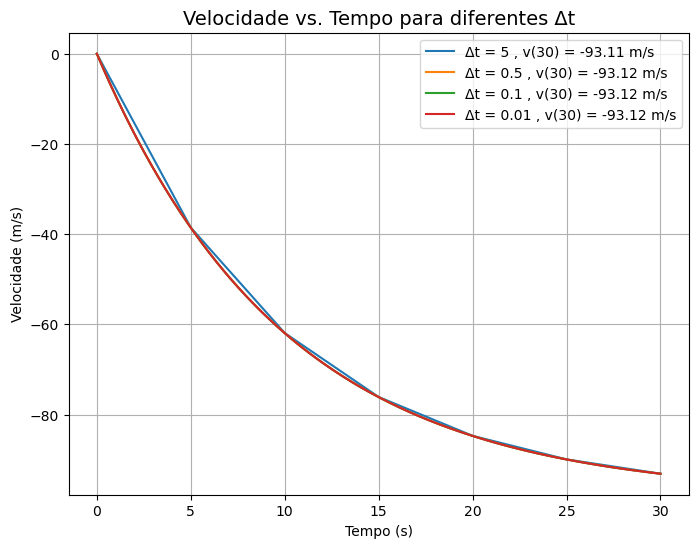

In [80]:
import matplotlib.pyplot as plt
import numpy as np


def Queda_Resistencia(t, v, b, g):
    return -g - (b/m) * v 


def RK4(v0, b, g, t0, tmax, dt):
    t = t0
    v = v0
    tempo = [t0]
    velocidade = [v0]

    while t < tmax:
        k1 = Queda_Resistencia(t, v, b, g)
        k2 = Queda_Resistencia(t + 0.5 * dt, v + 0.5 * dt * k1, b, g)
        k3 = Queda_Resistencia(t + 0.5 * dt, v + 0.5 * dt * k2, b, g)
        k4 = Queda_Resistencia(t + dt, v + dt * k3, b, g)

        v = v + (dt / 6) * (k1 + 2 * k2 + 2 * k3 + k4)
        t = t + dt
        tempo.append(t)
        velocidade.append(v)
    return tempo, velocidade


# Parâmetros
v0 = 0      # Velocidade inicial
b = 0.1     # Coeficiente de resistência 
g = 9.8     # Aceleração da gravidade
t0 = 0      # Tempo inicial
m = 1       # Massa
tmax = 30 # Tempo máximo
dt_values = [5, 0.5,  0.1, 0.01]  # Diferentes passos de tempo
velocidade_terminal = -m * g / b
solucao_analitica_30s  = -m * g / b * (1 - np.exp(-b/m * 30))  # Solução analítica para v(30)


plt.figure(figsize=(8, 6))

for dt in dt_values:
    tempo, velocidade = RK4(v0, b, g, t0, tmax, dt)
    plt.plot(tempo, velocidade, label=f'Δt = {dt} , v(30) = {velocidade[-1]:.2f} m/s')
    print(f'Δt = {dt} , v(30) = {velocidade[-1]} m/s')
    print(f'Erro absoluto = {abs(velocidade[-1] - solucao_analitica_30s)} m/s')
    print(f'Erro relativo = {abs(velocidade[-1] - solucao_analitica_30s) / abs(solucao_analitica_30s)}')
    print('----------------------------------')


plt.title('Velocidade vs. Tempo para diferentes Δt', fontsize=14)
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade (m/s)')
plt.grid(True)
plt.legend()
plt.show()

No plot acima, percebe-se que para $\Delta t = 0.01$ a curva decaiu mais rapidamente que para os passos $\Delta t = 5$, como esparado. Para valores como $\Delta = 0.5$,  $\Delta = 0.1$ não houve mudanças significativas no comportamento da curva. Para uma melhor visualização, foi calculado o erro absoluto da velocidade de cada curva em t= 30s em relação ao valor analítico. Assim, como esperado, para um passo $\Delta t = 0.01$ o erro foi o menor. 

# Comparação com o método de Euler 

Pode ser feita uma análise parecida com o que foi feito na simulação de monte Carlo, no que se diz a respeito do gráfico do fit do erro relativo. Essa análise é interessante, pois conseguimos visualizar que o método de Runge Kutta se mostra mais eficiente que o método de Euler, mesmo com valores de dt maiores(relativamente). 

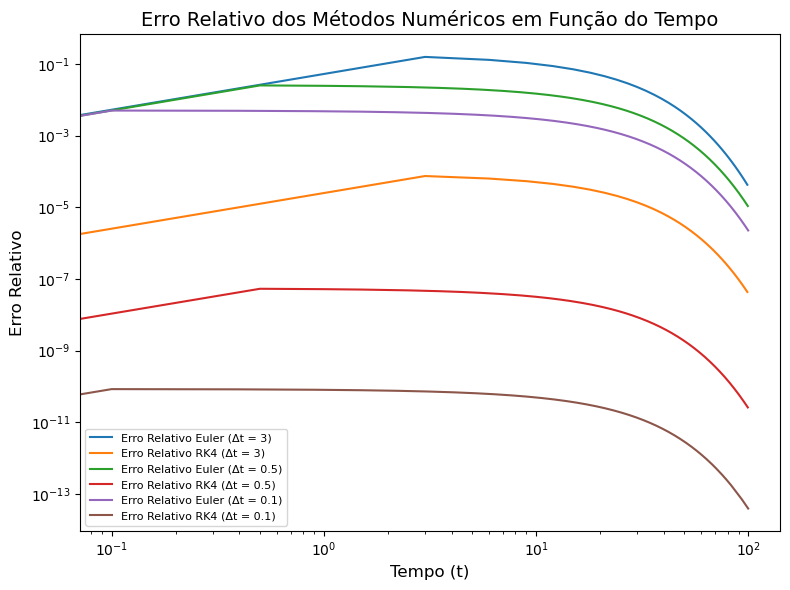

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


b = 0.1  # kg/m - coeficiente de resistência do ar
g = 9.8  # m/s^2 - aceleração da gravidade
m = 1    # kg - massa
v0 = 0   # m/s - velocidade inicial
t0 = 0   # s - tempo inicial
tmax = 100  # s - tempo máximo
dt_values = [3, 0.5, 0.1]  # valores de delta t
epsilon = 1e-8  # pequeno valor para evitar divisão por zero

# Função da aceleração (gravidade + resistência do ar)
def Queda_Resistencia(v):
    return -g - (b/m) * v

# Método de Euler
def metodo_euler(v0, t0, tmax, dt):
    t = np.arange(t0, tmax, dt)
    v = np.zeros(len(t))
    v[0] = v0
    for i in range(1, len(t)):
        v[i] = v[i-1] + dt * Queda_Resistencia(v[i-1])
    return t, v

# Método RK4
def metodo_rk4(v0, t0, tmax, dt):
    t = np.arange(t0, tmax, dt)
    v = np.zeros(len(t))
    v[0] = v0
    for i in range(1, len(t)):
        k1 = Queda_Resistencia(v[i-1])
        k2 = Queda_Resistencia(v[i-1] + 0.5 * dt * k1)
        k3 = Queda_Resistencia(v[i-1] + 0.5 * dt * k2)
        k4 = Queda_Resistencia(v[i-1] + dt * k3)
        v[i] = v[i-1] + (dt / 6) * (k1 + 2 * k2 + 2 * k3 + k4)
    return t, v

# Solução analítica
def solucao_analitica(t):
    v_terminal = -m * g / b
    return v_terminal * (1 - np.exp(-b * t / m)) # Essa solução pode ser obtida resolvendo a equação diferencial separando variáveis e integrando.


plt.figure(figsize=(8, 6))

# Loop para cada dt
for dt in dt_values:
    # Calcular soluções numéricas
    t_euler, v_euler = metodo_euler(v0, t0, tmax, dt)
    t_rk4, v_rk4 = metodo_rk4(v0, t0, tmax, dt)
     
    v_analitico_euler = solucao_analitica(t_euler)
    v_analitico_rk4 = solucao_analitica(t_rk4)
    
    # Calcular erro relativo (evita divisão por zero com o epsilon)
    erro_euler = np.abs((v_euler - v_analitico_euler) / (np.abs(v_analitico_euler) + epsilon))
    erro_rk4 = np.abs((v_rk4 - v_analitico_rk4) / (np.abs(v_analitico_rk4) + epsilon))

    plt.loglog(t_euler, erro_euler, label=f'Erro Relativo Euler (Δt = {dt})')
    plt.loglog(t_rk4, erro_rk4, label=f'Erro Relativo RK4 (Δt = {dt})')


plt.xlabel('Tempo (t)', fontsize=12)
plt.ylabel('Erro Relativo', fontsize=12)
plt.title('Erro Relativo dos Métodos Numéricos em Função do Tempo', fontsize=14)
plt.legend(fontsize=8)
plt.tight_layout()
plt.show()


Podemos ver que até mesmo para um passo $\Delta t = 3$, o Runge Kutta possui um erro menor do que passos de $\Delta t = 0.1$. A explicação disso será feita na atividade avançada 1F.